# Homework 1 - data validation & cleaning (deadline 16. 11. 2025, 23:59)

In short, the main task is to clean The Metropolitan Museum of Art Open Access dataset.
  
> The instructions are not given in detail: It is up to you to come up with ideas on how to fulfill the particular tasks as best as possible!

However, we **strongly recommend and require** the following:
* Follow the assignment step by step. Number each step.
* Most steps contain the number of features that should be treated. You can preprocess more features. However, it does not mean the teacher will give you more points. Focus on quality, not quantity.
* Properly comment on all your steps. Use Markdown cells and visualizations. Comments are evaluated for 2 points of the total, together with the final presentation of the solution. However, it is not desirable to write novels! 
* This task is timewise and computationally intensive. Do not leave it to the last minute.
* Hand in a notebook that has already been run (i.e., do not delete outputs before handing in).

## What are you supposed to do:

  1. Download the dataset MetObjects.csv from the repository https://github.com/metmuseum/openaccess/.
  1. Check consistency (i.e., that the same things are represented in the same way) of at least **three features** where you expect problems (including the "Object Name" feature). You can propose how to clean the selected features. However, **do not apply cleaning** (in your interest) 🙂 _(1.5 points)_
  1. Select at least **two features** (i.e., one couple) where you expect integrity problems (describe your choice) and check the integrity of those features. By integrity, we mean correct logical relations between features (e.g., female names for females only). _(2 points)_
  1. Convert at least **five features** to a proper data type. Choose at least one numeric, one categorical (i.e., ordinal or nominal), and one datetime. _(1.5 points)_
  1. Find some outliers and describe your method. _(3 points, depends on creativity)_
  1. Detect missing data in at least **three features**, convert them to a proper representation (if they are already not), and impute missing values in at least **one feature** using some imputation method (i.e., imputation by mean or median is too trivial to obtain any points). _(2 + 3 points, depends on creativity)_
  1. Focus more precisely on cleaning the "Medium" feature. As if you were to use it in the KNN classification algorithm later. _(3 points)_
  1. Focus on the extraction of the physical dimensions of each item (width, depth, and height in centimeters) from the "Dimensions" feature. _(2 points)_
  
All your steps, your choices of methods, and the following code **must be commented on!** For text comments (discussion, etc., not code comments), use **Markdown cells**. Comments are evaluated for 2 points together with the final presentation of the solution. 

**If you do all this properly, you will obtain 20 points.**

## Comments

  * Please follow the technical instructions from https://courses.fit.cvut.cz/NI-PDD/homeworks/index.html.
  * Methods that are more complex and were not shown during the tutorials are considered more creative and should be described in detail.
  * English is not compulsory.

In [134]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import re
from collections import defaultdict
from sklearn.preprocessing import OrdinalEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier
import pycountry
import geonamescache
import country_converter as coco

from rapidfuzz import process, fuzz

import seaborn as sns

In [2]:
df = pd.read_csv('MetObjects.csv', sep=',')

/tmp/ipykernel_26439/2664216508.py:1: DtypeWarning: Columns (5,7,10,11,12,13,14,34,35,36,37,38,39,40,41,42,43,44,45,46) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('MetObjects.csv', sep=',')


In [3]:
df.head(5)

,Object Number,Is Highlight,Is Timeline Work,Is Public Domain,Object ID,Gallery Number,Department,AccessionYear,Object Name,Title,...,River,Classification,Rights and Reproduction,Link Resource,Object Wikidata URL,Metadata Date,Repository,Tags,Tags AAT URL,Tags Wikidata URL
0,1979.486.1,False,False,False,1,NaN,The American Wing,1979.0,Coin,One-dollar Liberty Head Coin,...,NaN,NaN,NaN,http://www.metmuseum.org/art/collection/search/1,NaN,NaN,"Metropolitan Museum of Art, New York, NY",NaN,NaN,NaN
1,1980.264.5,False,False,False,2,NaN,The American Wing,1980.0,Coin,Ten-dollar Liberty Head Coin,...,NaN,NaN,NaN,http://www.metmuseum.org/art/collection/search/2,NaN,NaN,"Metropolitan Museum of Art, New York, NY",NaN,NaN,NaN
2,67.265.9,False,False,False,3,NaN,The American Wing,1967.0,Coin,Two-and-a-Half Dollar Coin,...,NaN,NaN,NaN,http://www.metmuseum.org/art/collection/search/3,NaN,NaN,"Metropolitan Museum of Art, New York, NY",NaN,NaN,NaN
3,67.265.10,False,False,False,4,NaN,The American Wing,1967.0,Coin,Two-and-a-Half Dollar Coin,...,NaN,NaN,NaN,http://www.metmuseum.org/art/collection/search/4,NaN,NaN,"Metropolitan Museum of Art, New York, NY",NaN,NaN,NaN
4,67.265.11,False,False,False,5,NaN,The American Wing,1967.0,Coin,Two-and-a-Half Dollar Coin,...,NaN,NaN,NaN,http://www.metmuseum.org/art/collection/search/5,NaN,NaN,"Metropolitan Museum of Art, New York, NY",NaN,NaN,NaN


In [4]:
df.shape

(484956, 54)

In [5]:
df.sample(5, random_state=100)

,Object Number,Is Highlight,Is Timeline Work,Is Public Domain,Object ID,Gallery Number,Department,AccessionYear,Object Name,Title,...,River,Classification,Rights and Reproduction,Link Resource,Object Wikidata URL,Metadata Date,Repository,Tags,Tags AAT URL,Tags Wikidata URL
215214,66.542.30,False,False,False,346492,NaN,Drawings and Prints,1966.0,Book,The Gate of Smaragdus,...,NaN,Books,NaN,http://www.metmuseum.org/art/collection/search...,NaN,NaN,"Metropolitan Museum of Art, New York, NY",NaN,NaN,NaN
305613,48.101.209a,False,False,True,450756,NaN,Islamic Art,1948.0,Beads,Beads,...,NaN,Glass,NaN,http://www.metmuseum.org/art/collection/search...,NaN,NaN,"Metropolitan Museum of Art, New York, NY",NaN,NaN,NaN
114299,64.164.28a–c,False,False,True,204129,NaN,European Sculpture and Decorative Arts,1964,Crèche figure,Angel,...,NaN,Crèche,NaN,http://www.metmuseum.org/art/collection/search...,NaN,NaN,"Metropolitan Museum of Art, New York, NY",Angels|Censers,http://vocab.getty.edu/page/aat/300379004|http...,https://www.wikidata.org/wiki/Q235113|https://...
469206,"Burdick 537, W500.690",False,False,False,826345,NaN,Drawings and Prints,1963.0,Photograph,Alsatian Girls from World War I Scenes souveni...,...,NaN,Photographs|Ephemera,NaN,http://www.metmuseum.org/art/collection/search...,NaN,NaN,"Metropolitan Museum of Art, New York, NY",NaN,NaN,NaN
346326,16.10.36,False,False,False,550389,122.0,Egyptian Art,1916.0,"Foundation Deposit Plaque, Lotus-Shaped",Plaque From a Foundation Deposit of Ramesses IV,...,NaN,NaN,NaN,http://www.metmuseum.org/art/collection/search...,https://www.wikidata.org/wiki/Q116417188,NaN,"Metropolitan Museum of Art, New York, NY",NaN,NaN,NaN


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 484956 entries, 0 to 484955
Data columns (total 54 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Object Number            484956 non-null  object 
 1   Is Highlight             484956 non-null  bool   
 2   Is Timeline Work         484956 non-null  bool   
 3   Is Public Domain         484956 non-null  bool   
 4   Object ID                484956 non-null  int64  
 5   Gallery Number           49541 non-null   object 
 6   Department               484956 non-null  object 
 7   AccessionYear            481094 non-null  object 
 8   Object Name              482690 non-null  object 
 9   Title                    456153 non-null  object 
 10  Culture                  208190 non-null  object 
 11  Period                   91143 non-null   object 
 12  Dynasty                  23201 non-null   object 
 13  Reign                    11236 non-null   object 
 14  Port

Lets find features with the biggest amount of missing values:

In [178]:
df.isnull().sum().head(20)

Object Number               0
Is Highlight                0
Is Timeline Work            0
Is Public Domain            0
Object ID                   0
Gallery Number         435415
Department                  0
AccessionYear            3862
Object Name              2266
Title                   28803
Culture                276766
Period                 393813
Dynasty                461755
Reign                  473720
Portfolio              458442
Constituent ID         202443
Artist Role            202443
Artist Prefix          202443
Artist Display Name    202443
Artist Display Bio     204533
dtype: int64

In [9]:
df.nunique()

Object Number              481656
Is Highlight                    2
Is Timeline Work                2
Is Public Domain                2
Object ID                  484956
Gallery Number                563
Department                     19
AccessionYear                 316
Object Name                 28631
Title                      245800
Culture                      7313
Period                       1891
Dynasty                       405
Reign                         396
Portfolio                    3959
Constituent ID              48365
Artist Role                  7118
Artist Prefix                8154
Artist Display Name         66949
Artist Display Bio          54658
Artist Suffix                2751
Artist Alpha Sort           66887
Artist Nationality           6945
Artist Begin Date           31231
Artist End Date             30864
Artist Gender                 290
Artist ULAN URL             38477
Artist Wikidata URL         40972
Object Date                 33197
Object Begin D

## Task 1. Consistency Check 

1) First i want to check **Accession Year** - the column should represent the year in which an object entered the Museum’s collection.

In [10]:
display(df["AccessionYear"].unique())
df["AccessionYear"].nunique()

array([1979.0, 1980.0, 1967.0, 1916.0, 1909.0, 1964.0, 1970.0, 1904.0,
       1976.0, 1938.0, 1918.0, 1946.0, 1960.0, 1910.0, 1922.0, 1923.0,
       1930.0, 1934.0, 1936.0, 1937.0, 1939.0, 1941.0, 1947.0, 1948.0,
       1949.0, 1971.0, 1984.0, 1989.0, 1985.0, 1952.0, 1968.0, 1919.0,
       nan, 1978.0, 1972.0, 1924.0, 1983.0, 1950.0, 1925.0, 1926.0,
       1931.0, 1932.0, 1951.0, 1953.0, 2006.0, 1969.0, 1975.0, 1981.0,
       1986.0, 1959.0, 1944.0, 1982.0, 1945.0, 1888.0, 1911.0, 1957.0,
       1943.0, 1935.0, 1917.0, 1973.0, 1940.0, 1913.0, 1962.0, 1914.0,
       1966.0, 1954.0, 1920.0, 1933.0, 2014.0, 1928.0, 1901.0, 1958.0,
       1965.0, 1883.0, 1902.0, 1987.0, 1974.0, 1977.0, 1915.0, 1942.0,
       1912.0, 1927.0, 1896.0, 1892.0, 1877.0, 1906.0, 1955.0, 1961.0,
       1994.0, 1907.0, 1929.0, 2018.0, 1921.0, 1908.0, 1963.0, 2010.0,
       2000.0, 1988.0, 2021.0, 1956.0, 2012.0, 2013.0, 2002.0, 1999.0,
       1894.0, 1897.0, 1993.0, 1893.0, 1992.0, 1996.0, 1898.0, 1899.0,
       19

316

Ideally, this feature should contain valid years only, stored as either integers or a proper datetime value. Instead of this we have some issues:
 * some records contain only a year, like 1979.0
 * some records contain a full date, such as 1969-07-10
 * some years are stored as strings, while others are stored as floats
   
These inconsistencies cause pandas to treat the entire column as dtype = object, even though most entries contain simple years.





2) Next, we analyze the **Artist Nationality** feature.

In [11]:
print("\nUnique nationalities:", df["Artist Nationality"].nunique())
print(df["Artist Nationality"].value_counts().head(30))


Unique nationalities: 6945
Artist Nationality
American                                     69831
                                             26011
French                                       21639
Italian                                      13172
British                                      12672
French|French                                10920
American|American                            10289
German                                        7988
Japanese                                      6961
Italian|Italian                               5220
French|French|French                          5152
American|                                     4459
British|British                               4339
Dutch                                         2862
British|British|British                       2326
Chinese                                       2020
 |American                                    1932
 |                                            1737
Netherlandish                      

Quick normalization check:

In [12]:
df["nat_clean"] = df["Artist Nationality"].str.lower().str.strip()
print("Unique nationalities (lowercased):", df["nat_clean"].nunique())

Unique nationalities (lowercased): 6923


Let's find the least frequent nationalities:

In [13]:
nat_counts = df["Artist Nationality"].value_counts(dropna=False)
least_freq = nat_counts[nat_counts == 1]

print("\nNumber of nationalities that appear only once:", len(least_freq))
print("\nExamples of nationalities:")
print(least_freq.head(20))


Number of nationalities that appear only once: 4495

Examples of nationalities:
Artist Nationality
American|American|American|American|American|American|American, born Germany|American                                1
Scottish|British|British|British|British|British, Scottish                                                           1
Slovenian                                                                                                            1
American|American|American|American|American|American|American|American|American|American, born Scotland|American    1
Roman|French|British|British                                                                                         1
British|Scottish|British|American|British                                                                            1
British|British|Norwegian                                                                                            1
French|Scottish|German|British|British                             

The data shows a very high level of inconsistency.

Key observations:
 *  *Redundant repetition using "|" separator*, like "French|French", "Italian|Italian|Italian".
   These appear to represent repeated or concatenated classifications but don't give meaningful new information.
 * *Comma-separated nationalities*, such as "British, Scottish", or "American, born Germany". These contain mixed information: nationality and biographical details.
 * *empty token*, examples: " |American", " |" 

Overall, the nationalities highlight the lack of standardization. This part of the data would require significant cleaning, normalize these values into a controlled vocabulary.

3) Now we focuse on exploring consistency issues in the **Object Name** feature.

In [14]:
obj_counts = df["Object Name"].value_counts(dropna=True)

print("Total rows with Object Name:", df["Object Name"].notna().sum())
print("Number of unique Object Name values:", obj_counts.shape[0])
print(df["Object Name"].value_counts().head(20))

Total rows with Object Name: 482690
Number of unique Object Name values: 28631
Object Name
Print                                   102986
Photograph                               29451
Drawing                                  26018
Book                                     13397
Kylix fragment                            8926
Piece                                     8621
Fragment                                  7213
Painting                                  6014
Negative                                  5928
Bowl                                      3633
Vase                                      3219
Figure                                    3035
Dress                                     2639
Baseball card                             2505
Baseball card, print                      2463
Textile fragment                          2301
Plate                                     2230
Ensemble                                  2121
Books Prints Ornament & Architecture      2120
Baseball card, p

In [15]:
df["Object Name lower"] = df["Object Name"].str.lower().str.strip()
print("Unique (lowercased) object names:", df["Object Name lower"].nunique())

Unique (lowercased) object names: 27486


After lowercasing the number of unique names only decreases slightly.

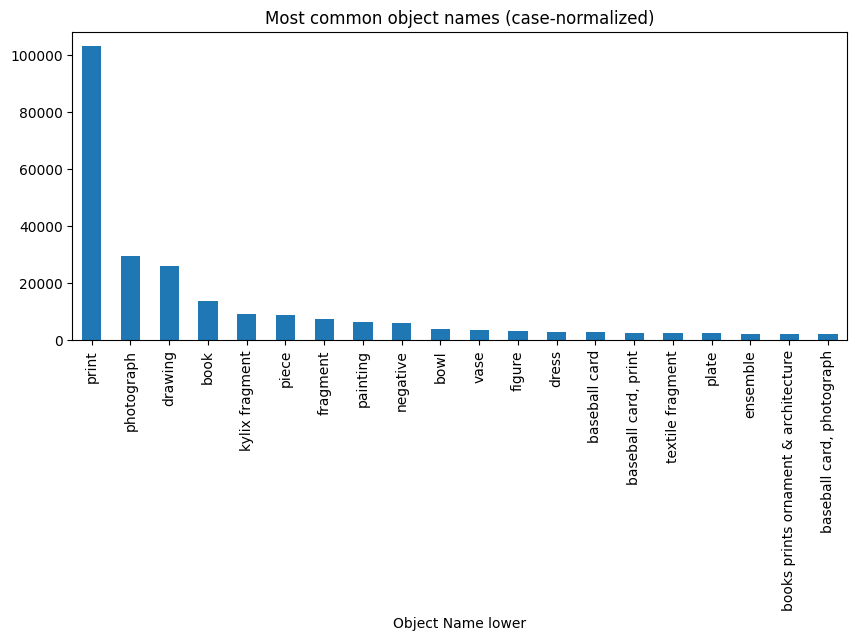

In [16]:
df["Object Name lower"].value_counts().head(20).plot(kind="bar", figsize=(10,4))
plt.title("Most common object names (case-normalized)")
plt.show()

The most frequent object names look clean and well-defined (“Print”, “Photograph”, “Drawing”, “Book”), but after that, the vocabulary becomes extremely diverse. Let's look at object names that appear only once:

In [17]:
least_freq = obj_counts[obj_counts == 1]
print("\nNumber of Object Names that appear only once:", len(least_freq))

print("\nExamples of least frequent Object Names:")
print(least_freq.head(20))


Number of Object Names that appear only once: 18788

Examples of least frequent Object Names:
Object Name
Stela, Senba, Niseret                                                    1
sickle, insert, denticulate, truncated, segment, blade, tool, element    1
Tile fragment, shoulder (?)                                              1
Scaraboid fragment                                                       1
Sealing, Seth animal, double crown, cobra                                1
Dish, ritual event                                                       1
Sealing, Horus, falcon                                                   1
Projectile point, arrowhead                                              1
Kylix fragment?; lipped inside and out                                   1
Scaraboid with Hathor emblem                                             1
Sarcophagus, Harkhebit                                                   1
Tile fragment, uraeus                                               

Many values are not simple object types but rather long descriptive strings.

##### Unique Categories

In [18]:
percent_single = len(least_freq) / len(obj_counts) * 100
print(f"\nPercent of unique object names that occur only once: {percent_single:.2f}%")


Percent of unique object names that occur only once: 65.62%


This is an extremely large proportion. More than two-thirds of all unique object names appear only a single time. This indicates:

* A huge amount of noise

* Poor standardization

* Many overly descriptive or overly specific entries

* Typos, and phrases that do not belong to a controlled vocabulary

##### Synonyms
Some words appear in anotner object names, like "Baseball card, print" contains "Baseball card" and "Print". So i have the function which normalize an object name to detect synonyms. This function:
* converts to lowercase
* removes punctuation
* removes content inside parentheses
* singularizes simple plural forms
* strips whitespace

In [19]:
def normalize_for_synonyms(name: str):
    if pd.isna(name):
        return np.nan
    
    name = name.lower().strip()
    name = re.sub(r"\(.*?\)", "", name)
    name = re.sub(r"[-_,;:]", " ", name)
    name = re.sub(r"\s+", " ", name).strip()
    
    words = name.split()
    if words:
        last = words[-1]
        if last.endswith("s") and len(last) > 3:
            words[-1] = last[:-1]
    return " ".join(words)

df["obj_syn"] = df["Object Name"].apply(normalize_for_synonyms)

synonym_groups = df.groupby("obj_syn")["Object Name"].unique()

print("\n=== Example synonym groups (first 15) ===")
for label, group in synonym_groups.head(15).items():
    print(f"{label:30} -> {list(group)[:8]}")


=== Example synonym groups (first 15) ===
"autophone" organette          -> ['"Autophone" Organette']
"basso"                        -> ['"Basso"']
"chanot model" violin          -> ['"Chanot Model" Violin']
"humantone" nose flute         -> ['"Humantone" Nose Flute']
"japanese fiddle"              -> ['"Japanese Fiddle"']
"ladies in blue" fresco        -> ['"Ladies in Blue" Fresco']
"musical ball"                 -> ['"Musical Ball" ("Return Ball")']
"new year's bottle" with cow goddess nebethetepet -> ['"New Year\'s Bottle" with cow goddess Nebethetepet']
"persian" sitar                -> ['"Persian" Sitar']
"russian bassoon"              -> ['"Russian Bassoon" (Bass Horn)']
"savart model" violin          -> ['"Savart model" Violin']
"shield frieze" fresco         -> ['"Shield frieze" Fresco']
"tea pot"                      -> ['"Tea-pot"']
"zobo flute"                   -> ['"Zobo Flute" (Kazoo)']
"zobo horn"                    -> ['"Zobo Horn" (Kazoo)']


As expected, Object Name values often differ only by formatting, punctuation, or descriptive extensions, even though they refer to the same underlying object type.

**How Object Name Should Be Cleaned:**
  1. *Normalize formatting* : convert all values to lowercase, remove quotation marks, remove or standardize hyphens/underscores/ parentheses, collapse multiple spaces
  2. *Separate descriptive modifiers from core object type*. For example:
   * Extract the main noun (“violin”, “fresco”, “horn”, “flute”)
   * Store the descriptive part separately (e.g., “Persian”, “Russian”, “Chanot Model”)

  3. *Establish a controlled vocabulary*. Map all variants to consistent standard names, like:

   * “tea-pot”, “tea pot”, “teapot” → “teapot”

   * “zobo horn (kazoo)” → “kazoo” or “zobo horn”

   * “chanot model violin” → “violin” with model stored in another field
  4. *Detect and group near-synonyms*
  5. *Optionally, build a hierarchical taxonomy*. For example:
   * instrument → woodwind → horn
   * pottery → vase → kylix fragment

## Task 2. Integrity Check

For the integrity analysis, I selected the pair of features: **Object Begin Date** and **Object End Date**.
These two features represent the start and end of the time period during which the object was created. 

They are expected to follow a clear logical rule: *Object Begin Date must be less than or equal to Object End Date.*

In [20]:
display(df["Object Begin Date"].unique())
display(df["Object End Date"].unique())

array([ 1853,  1901,  1909, ...,  2022, -1376,    21])

array([ 1853,  1901,  1927, ..., -1001,    21,  2023])

The dataset includes *Negative years*, negative values correspond to BCE dates. Technically, negative values are historically valid, but only for ancient artifacts. They must be interpreted correctly (-1376 = 1376 BCE).

Very small CE years (like 21) are valid for early historical periods.

Identical begin and end years indicates creation in a single year.

**What We Consider Potential Problems:**

 * Future dates (beyond current year, > 2025)

 * Year 0 (not a real year in CE/BCE system)

 * Begin > End - definite integrity violation

In [21]:
CURRENT_YEAR = 2025
invalid_future_begin = df[df["Object Begin Date"] > CURRENT_YEAR]
invalid_future_end   = df[df["Object End Date"] > CURRENT_YEAR]
print("\nRows with Invalid Future Begin Date:", len(invalid_future_begin))
print("Rows with Invalid Future End Date:", len(invalid_future_end))


Rows with Invalid Future Begin Date: 2
Rows with Invalid Future End Date: 37


Not so many wrong values according to the size of dataset.

In [22]:
begin_zero = df[df["Object Begin Date"] == 0]
end_zero   = df[df["Object End Date"] == 0]
print("\nRows with Begin Date = 0:", len(begin_zero))
print("Rows with End Date = 0:", len(end_zero))


Rows with Begin Date = 0: 1372
Rows with End Date = 0: 1303


Year 0 appears in a meaningful portion of the dataset and must be addressed. In many cases it looks like not a year with value 0 but a missing value.

In [23]:
chronology_violations = df[df["Object Begin Date"] > df["Object End Date"]]

print("Number of chronology violations (Begin > End):", len(chronology_violations))

print("\nExamples of chronology violations:")
display(chronology_violations[["Object Name","Object Begin Date","Object End Date"]].head(10))

Number of chronology violations (Begin > End): 205

Examples of chronology violations:


,Object Name,Object Begin Date,Object End Date
27043,Sword,5,0
32741,Yaksha,-45,-55
38712,Statue,1300,14
47453,Print,1861,9
79176,Dolman,1875,1800
106170,Head,1500,0
118956,Fan,1785,1779
136576,Sample and letter,1785,1773
138630,Fragments,1785,1779
143021,Ring with scarab,0,-5


In [24]:
pct_chronology_violations = len(chronology_violations) / len(df) * 100
print(f"Percentage of Chronology Violations (Begin > End): {pct_chronology_violations:.4f}%")

Percentage of Chronology Violations (Begin > End): 0.0423%


Chronology violations, although not extremely common(**0.0423%**), represent definite integrity problems that require fixing.

## Task 3.  Data Type Conversion

Many features in the dataset are currently stored as object type, even though they represent numerical values, categorical labels, or dates.

#### Categorical

In [25]:
df.nunique()

Object Number              481656
Is Highlight                    2
Is Timeline Work                2
Is Public Domain                2
Object ID                  484956
Gallery Number                563
Department                     19
AccessionYear                 316
Object Name                 28631
Title                      245800
Culture                      7313
Period                       1891
Dynasty                       405
Reign                         396
Portfolio                    3959
Constituent ID              48365
Artist Role                  7118
Artist Prefix                8154
Artist Display Name         66949
Artist Display Bio          54658
Artist Suffix                2751
Artist Alpha Sort           66887
Artist Nationality           6945
Artist Begin Date           31231
Artist End Date             30864
Artist Gender                 290
Artist ULAN URL             38477
Artist Wikidata URL         40972
Object Date                 33197
Object Begin D

As we can see, several features have extremely high cardinality, such as *Dimensions, Title, Artist Display Name, Medium, Tags,* etc.

Such features are not suitable for category conversion at this point because they would create thousands of categories, and bring no analytical benefit.

The **Artist Gender** feature contains 290 unique values, but realistically, artist gender as a Nominal Categorical data should only contain:
* "Female"
* "Male"
* "Unknown" or missing

In [26]:
display(df["Artist Gender"].head(100000).unique())

array([nan, '|', '|Female', '||', '||||', 'Female|', 'Female', '|||',
       'Female|Female', '||Female', '|Female|Female', 'Female||',
       'Female|Female|Female|Female|Female||Female|Female||||||Female|Female|Female|Female|||Female|||Female|Female|',
       '|Female|', '|||Female', 'Female||Female', 'Female|Female|Female|',
       '||||||||', '|||||||||||||||||||||||||||', 'Female|Female|',
       'Female|Female||', 'Female|||', '|Female||', '||Female|Female',
       '|Female||Female', '||Female|', 'Female|Female|Female'],
      dtype=object)

So let's convert to lowercase and strip whitespace, replace empty strings or NaN with "unknown", remove corrupted entries full of "|" characters

In [27]:
gender_raw = df["Artist Gender"].copy()
gender = gender_raw.str.lower().str.strip()

gender = gender.replace("", np.nan)
gender = gender.fillna("unknown")

def extract_gender(value: str):
    if not isinstance(value, str):
        return "unknown"
    
    if "female" in value:
        return "female"
    if "male" in value:
        return "male"
    
    return "unknown"

gender = gender.apply(extract_gender)

Convert to categorical:

In [28]:
df["Artist Gender Cleaned"] = gender.astype("category")

print("Unique cleaned values:", df["Artist Gender Cleaned"].unique())
print(df["Artist Gender Cleaned"].value_counts())

Unique cleaned values: ['unknown', 'female']
Categories (2, object): ['female', 'unknown']
Artist Gender Cleaned
unknown    470289
female      14667
Name: count, dtype: int64


We can see that dataset contains **no male values**, which can suggests that in the original dataset male gender stored as a default gender, as a result we cannot distinguish between true "male" and true "unknown".

We can consider an optional heuristic method for gender estimation.

The idea is to use *Artist Display Name* and compare the first name to a list of known male first names. One such option is gender-guesser, which contains a large database sourced from census data. 

In [29]:
import gender_guesser.detector as gender

detector = gender.Detector()

df["Artist Gender Cleaned"] = df["Artist Gender Cleaned"].astype(str)

def extract_first_name(name):
    if not isinstance(name, str):
        return ""
    parts = name.split()
    if len(parts) == 0:
        return ""
    return parts[0]

df["Artist First Name"] = df["Artist Display Name"].apply(extract_first_name)

def infer_gender_guess(row):
    if row["Artist Gender Cleaned"] == "female":
        return "female"
    
    first = row["Artist First Name"]
    g = detector.get_gender(first)
    
    if g in ["male", "mostly_male"]:
        return "male (approx)"
    
    return "unknown"

df["Artist Gender Approx"] = df.apply(infer_gender_guess, axis=1)

print(df["Artist Gender Approx"].value_counts())

Artist Gender Approx
unknown          312595
male (approx)    157694
female            14667
Name: count, dtype: int64


As a result we have approximate 157694 male artists in dataset. However, this solution is very limited, because:

 *  Many artists use pseudonyms or initials
 *  Many names are culturally ambiguous
 *  Some artists use mononyms or titles
 *  Non-Western names may not appear in this list

This approach does not guarantee correctness, but it can uncover some clearly male artists.

In [30]:
df["Artist Gender"] = df["Artist Gender Approx"].astype("category")
print(df["Artist Gender"].value_counts())

Artist Gender
unknown          312595
male (approx)    157694
female            14667
Name: count, dtype: int64


Now we can work with **Department** feature.

In [31]:
display(df["Department"].unique())
display(df["Department"].nunique())

array(['The American Wing', 'European Sculpture and Decorative Arts',
       'Modern and Contemporary Art', 'Arms and Armor', 'Medieval Art',
       'Asian Art', 'Islamic Art', 'Costume Institute',
       'Arts of Africa, Oceania, and the Americas', 'Drawings and Prints',
       'Greek and Roman Art', 'Photographs', 'Ancient Near Eastern Art',
       'Egyptian Art', 'European Paintings', 'Robert Lehman Collection',
       'The Cloisters', 'Musical Instruments', 'The Libraries'],
      dtype=object)

19

This is one of the best option for converting to categorical dtype, this feature contains a small set of repeating labels, only 19 departments of the museum.

In [32]:
df["Department"] = df["Department"].astype("category")

Let's take a look at **Country** column and first 30 most common countries:

In [33]:
country_counts = df["Country"].value_counts()

print("Top 30 raw countries:\n", country_counts.head(30))

total_non_null = df["Country"].notna().sum()
coverage_raw = country_counts.head(30).sum() / total_non_null * 100

print(f"\nCoverage of top 30 raw countries: {coverage_raw:.2f}%")

Top 30 raw countries:
 Country
Egypt                               31296
United States                        9169
Iran                                 6276
Peru                                 3393
France                               1726
Byzantine Egypt                      1673
Mexico                               1540
India                                1418
Indonesia                            1410
England                              1099
China                                 923
Turkey                                899
Papua New Guinea                      879
Germany                               854
Nigeria                               637
Italy                                 511
Democratic Republic of the Congo      492
Syria                                 469
Spain                                 413
Iraq                                  412
Canada                                387
Mali                                  377
Colombia                              333
Côt

We can see that some values are the same, but have some incorrect representation, like "United States|United States", or have some  clarification, like "Byzantine Egypt" instead of "Egypt." 

Let's do a basic normalization: convert to lowercase, trim whitespaces, remove pipes: 

In [34]:
country_clean = (
    df["Country"]
        .str.lower()
        .str.strip()
)

country_clean = (
    country_clean
        .str.replace(r"\|+", "|", regex=True)
        .str.strip("|")
)

country_clean = country_clean.apply(
    lambda x: x.split("|")[0] if isinstance(x, str) and "|" in x else x
)

normalization_map = {
    "america": "united states",
    "byzantine egypt": "egypt",
    "present-day france": "france"
}

country_clean = country_clean.replace(normalization_map)

df["Country_norm"] = country_clean

Extract top 30:

In [35]:
top30_clean = df["Country_norm"].value_counts().head(30)
top30_set = set(top30_clean.index)

print("Top 30 cleaned countries:\n", top30_clean)

Top 30 cleaned countries:
 Country_norm
egypt                               33017
united states                        9878
iran                                 6529
peru                                 3413
france                               1926
mexico                               1547
india                                1448
indonesia                            1410
england                              1232
china                                 936
turkey                                900
papua new guinea                      880
germany                               860
nigeria                               637
italy                                 518
democratic republic of the congo      503
syria                                 485
spain                                 421
iraq                                  420
canada                                392
mali                                  377
colombia                              334
côte d'ivoire                       

In [36]:
def map_country_safe(x):
    if isinstance(x, str):
        return x if x in top30_set else "other"
    return np.nan

df["Country_top30"] = df["Country_norm"].apply(map_country_safe)
df["Country_top30"] = df["Country_top30"].astype("category")

In [37]:
valid_rows = df["Country_norm"].notna().sum()

counts_top30_feature = df.loc[df["Country_norm"].notna(), "Country_top30"].value_counts()

other_count = counts_top30_feature["other"]
top30_count = counts_top30_feature.drop("other").sum()

percent_other = other_count / valid_rows * 100
percent_top30 = top30_count / valid_rows * 100

print(f"Total valid Country rows: {valid_rows}")
print(f"Rows labeled 'other': {other_count} ({percent_other:.2f}%)")
print(f"Rows belonging to top-30 countries: {top30_count} ({percent_top30:.2f}%)")

Total valid Country rows: 76007
Rows labeled 'other': 6212 (8.17%)
Rows belonging to top-30 countries: 69795 (91.83%)


A total coverage of top 30 countries is a little bit bigger(**91.83%** instead of **89.84**). Some previously duplicated entries collapse into unified labels.

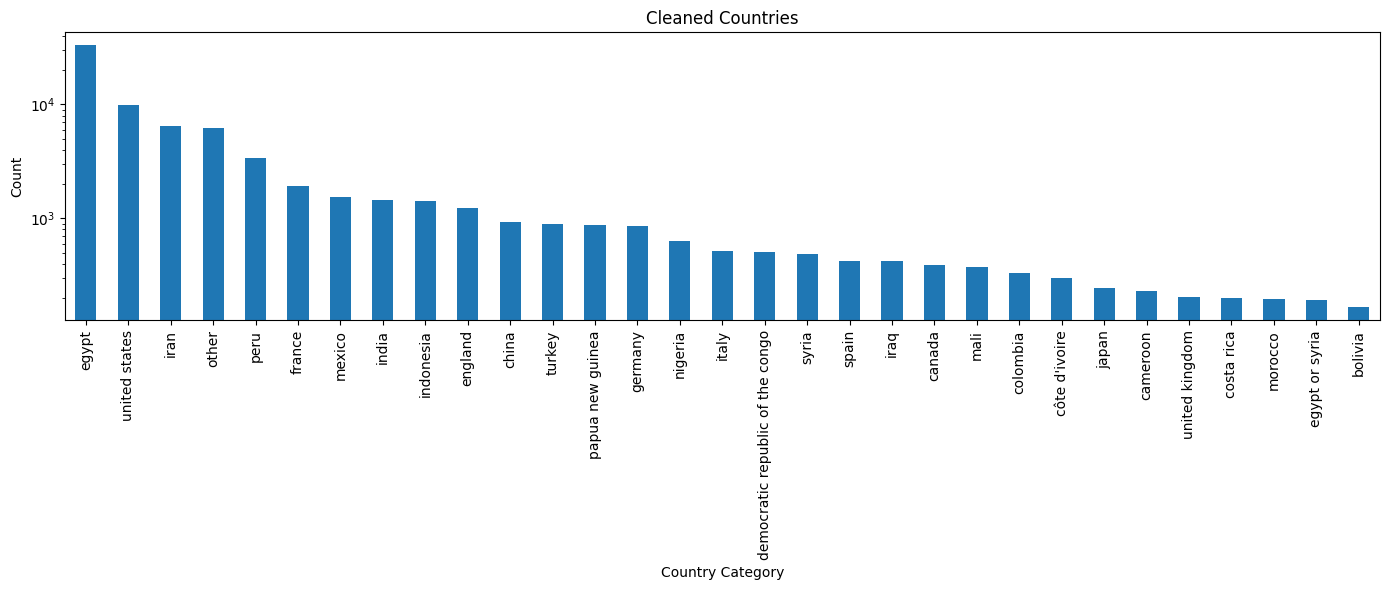

In [38]:
country_plot_clean = counts_top30_feature

plt.figure(figsize=(14,6))
country_plot_clean.plot(kind="bar")
plt.yscale("log")
plt.title("Cleaned Countries")
plt.xlabel("Country Category")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

#### Datetime

Since we already know some information about **Accession Year**, i chose this feature for converting to a proper datetime-like datatype. Values are mixed: sometimes there are only years, sometimes full dates:

In [39]:
acc = df["AccessionYear"]
print("Data types inside AccessionYear:")
is_float = acc.apply(lambda x: isinstance(x, float)).sum()
is_int = acc.apply(lambda x: isinstance(x, int)).sum()
is_str = acc.apply(lambda x: isinstance(x, str)).sum()
is_nan = acc.isna().sum()

print("\nFloat values:", is_float)
print("Integer values:", is_int)
print("String values:", is_str)
print("NaN values:", is_nan)

Data types inside AccessionYear:

Float values: 426605
Integer values: 16384
String values: 41967
NaN values: 3862


To standardize this feature, we convert all entries into a full date with format **YYYY-MM-DD**, where 
 * Full date present (YYYY-MM-DD) → Parsed directly as a date.

 * Only year present (YYYY or YYYY.0) → Converted to January 1st of that year (e.g., 1984 → 1984-01-01).

 * Missing values → Converted to NaT.

In [40]:
def convert_accession_year(value):
    
    if pd.isna(value):
        return pd.NaT
    
    s = str(value).strip()
    
    if re.fullmatch(r"\d{4}\.0", s):
        s = s.replace(".0", "")
    
    if re.fullmatch(r"\d{4}-\d{2}-\d{2}", s):
        try:
            return pd.to_datetime(s, errors="coerce")
        except:
            return pd.NaT
    
    if re.fullmatch(r"\d{4}", s):
        year = int(s)
        return pd.to_datetime(f"{year}-01-01")
    
    return pd.NaT

df["AccessionYear_fullDate"] = acc.apply(convert_accession_year)

print(df["AccessionYear_fullDate"].head(10))
print("Dtype:", df["AccessionYear_fullDate"].dtype)

print("\nNumber of NaT values:", df["AccessionYear_fullDate"].isna().sum())

0   1979-01-01
1   1980-01-01
2   1967-01-01
3   1967-01-01
4   1967-01-01
5   1967-01-01
6   1967-01-01
7   1967-01-01
8   1967-01-01
9   1979-01-01
Name: AccessionYear_fullDate, dtype: datetime64[ns]
Dtype: datetime64[ns]

Number of NaT values: 3862


In [41]:
display(df["AccessionYear"].nunique())
display(df["AccessionYear_fullDate"].nunique())
df["AccessionYear_fullDate"].unique()

316

180

<DatetimeArray>
['1979-01-01 00:00:00', '1980-01-01 00:00:00', '1967-01-01 00:00:00',
 '1916-01-01 00:00:00', '1909-01-01 00:00:00', '1964-01-01 00:00:00',
 '1970-01-01 00:00:00', '1904-01-01 00:00:00', '1976-01-01 00:00:00',
 '1938-01-01 00:00:00',
 ...
 '1967-08-12 00:00:00', '1967-12-04 00:00:00', '1969-07-10 00:00:00',
 '1969-07-17 00:00:00', '1970-09-08 00:00:00', '1950-07-21 00:00:00',
 '1953-01-19 00:00:00', '1955-05-24 00:00:00', '1962-10-15 00:00:00',
 '1959-12-28 00:00:00']
Length: 181, dtype: datetime64[ns]

**Accession Year** has 316 unique values, **AccessionYear_fullDate** has only 180. Dates that were originally in the correct format YYYY-MM-DD remained in the correct format, and data that simply contained the year now aligned with January 1st.

Show some random lines for comparison:

In [42]:
df[["AccessionYear", "AccessionYear_fullDate"]].sample(15, random_state=60)

,AccessionYear,AccessionYear_fullDate
75204,1970.0,1970-01-01
75690,1976.0,1976-01-01
165430,1949,1949-01-01
49680,1881.0,1881-01-01
80075,1976.0,1976-01-01
121866,1907.0,1907-01-01
127372,1913.0,1913-01-01
54327,1893.0,1893-01-01
348039,NaN,NaT
478118,1963,1963-01-01


#### Numeric

**Gallery Number** is a numeric-looking feature: most values are numbers (room or gallery identifiers) which should ideally be stored as a numeric type.

In [43]:
display(df["Gallery Number"].unique())
print("Unique Gallery Number count:", df["Gallery Number"].nunique())

array([nan, '774', '706', '724', '741', '728', '719', '718', '729', '712',
       '516', '737', '738', '701', '734', '708', '722', '713', '730',
       '752', '736', '714', '740', '743', '725', '739', '745', '700',
       '704', '750', '512', '751', '717', '749', '733', '773', '710',
       '744', '726', '705', '732', '731', '723', '715', '508', '510',
       '747', '756', '720', '721', '766', '761', '762', '754', '372',
       '554', '707', '764', '768', '771', '760', '758', '759', '763',
       '681', '824', '769', '748', '753', '772', '755', 'in Great Hall',
       '767', '770', '765', '703', '809', '735', '727', '599', 774.0,
       772.0, 751.0, 705.0, 706.0, 754.0, 773.0, 743.0, 770.0, 719.0,
       731.0, 726.0, 752.0, 742.0, 717.0, 707.0, 701.0, 741.0, 704.0,
       728.0, 744.0, 763.0, 724.0, 765.0, 747.0, 750.0, 730.0, 700.0,
       708.0, 745.0, 759.0, 736.0, 758.0, 715.0, 762.0, 760.0, 757.0,
       380.0, 378.0, 371.0, 372.0, 379.0, 375.0, 374.0, 376.0, 373.0,
       455.0

Unique Gallery Number count: 563


The problem is with some of the **string values**: "on Fifth Avenue", "in Great Hall", "Watson Library" and "Petrie Ct. Café".

There are only 4 of these values, but they prevent us from converting feature into the correct numeric format.
We have two options, neither of which looks correct:

  *   Giving these string-name galleries some new ID value that we don't have in our dataset yet
  *   or Creating new feature with only this 4 non-numeric Gallery "numbers".

 I did a little research on the Met museum website and saw, there are many other rooms in the gallery that have their own ID, for example Gallery "on Fifth Avenue" have another rooms inside. 
 
 So I'll choose the second option, because if we give our string galleries new numbers, these numbers may accidentally coincide with the numbers of galleries/rooms that are not specified in our dataset, but which exist within these string galleries. 

In [44]:
df["Gallery Number Numeric"] = pd.to_numeric(df["Gallery Number"], errors="coerce")

num_valid = df["Gallery Number Numeric"].notna().sum()
num_total = len(df["Gallery Number"])
num_invalid = num_total - num_valid

print("\nNumber of valid numeric gallery numbers:", num_valid)
print("Number of non-numeric/missing gallery entries:", num_invalid)

df["Gallery Number Numeric"] = df["Gallery Number Numeric"].astype("Int64")


Number of valid numeric gallery numbers: 49504
Number of non-numeric/missing gallery entries: 435452


Create a separate categorical for “non-numeric gallery” labels, keep original string entries in a separate column

In [45]:
non_numeric = df[df["Gallery Number Numeric"].isna() & df["Gallery Number"].notna()]
print("\nExamples of non-numeric gallery entries:")
print(non_numeric["Gallery Number"].unique()[:10])

df["Gallery Number Other"] = np.where(df["Gallery Number Numeric"].isna(),
                                      df["Gallery Number"],
                                      pd.NA)
df["Gallery Number Other"] = df["Gallery Number Other"].astype("string")


Examples of non-numeric gallery entries:
['in Great Hall' 'Petrie Ct. Café' 'on Fifth Avenue' 'Watson Library']


Display rows where we have non-numeric galleries

In [46]:
print("\nRows with non-numeric gallery values:")
display(df[df["Gallery Number Other"].notna()][["Gallery Number", "Gallery Number Numeric", "Gallery Number Other"]].head(10))


Rows with non-numeric gallery values:


,Gallery Number,Gallery Number Numeric,Gallery Number Other
10164,in Great Hall,<NA>,in Great Hall
102780,Petrie Ct. Café,<NA>,Petrie Ct. Café
103766,Petrie Ct. Café,<NA>,Petrie Ct. Café
107259,Petrie Ct. Café,<NA>,Petrie Ct. Café
112051,Petrie Ct. Café,<NA>,Petrie Ct. Café
112301,Petrie Ct. Café,<NA>,Petrie Ct. Café
112305,Petrie Ct. Café,<NA>,Petrie Ct. Café
114849,Petrie Ct. Café,<NA>,Petrie Ct. Café
115170,in Great Hall,<NA>,in Great Hall
116179,Petrie Ct. Café,<NA>,Petrie Ct. Café


In [47]:
display(df["Gallery Number Other"].unique())
display(df["Gallery Number Numeric"].unique())

<StringArray>
[<NA>, 'in Great Hall', 'Petrie Ct. Café', 'on Fifth Avenue',
 'Watson Library']
Length: 5, dtype: string

<IntegerArray>
[<NA>,  774,  706,  724,  741,  728,  719,  718,  729,  712,
 ...
  126,  128,  138,  137,  133,  129,  132,  102,  914,  918]
Length: 376, dtype: Int64

Now we have **Gallery Number Numeric** with numeric datatype and  **Gallery Number Other** with string datatype.

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 484956 entries, 0 to 484955
Data columns (total 65 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   Object Number            484956 non-null  object        
 1   Is Highlight             484956 non-null  bool          
 2   Is Timeline Work         484956 non-null  bool          
 3   Is Public Domain         484956 non-null  bool          
 4   Object ID                484956 non-null  int64         
 5   Gallery Number           49541 non-null   object        
 6   Department               484956 non-null  category      
 7   AccessionYear            481094 non-null  object        
 8   Object Name              482690 non-null  object        
 9   Title                    456153 non-null  object        
 10  Culture                  208190 non-null  object        
 11  Period                   91143 non-null   object        
 12  Dynasty         

## Task 4.  Outliers Detection

In this step i try to find outliers in artist Birth/Death Years using human lifespan rules. First we need to identify incorrect or suspicious values in the **Artist Begin Date** and **Artist End Date** features.

In [50]:
df["Artist Begin Date"].sample(10, random_state=102)

299427                                 NaN
301398                                 NaN
244683    1728      |1723      |1781      
230491                          1800      
56507                                  NaN
97779                                  NaN
157036                          1923-06-24
307989                                 NaN
138348               1859      |1831      
375270    1808      |1829      |1829      
Name: Artist Begin Date, dtype: object

In [51]:
df["Artist End Date"].sample(10, random_state=182)

408855    9999      |9999      |9999      |9999      
139261                                            NaN
22687                                             NaN
267399                                     1950      
267143                                     1713      
123071                                            NaN
219452                          1676      |1641      
242642                          1989      |          
79126                                                
458948                                     1959      
Name: Artist End Date, dtype: object

The raw data contains many inconsistencies, including:
 * non-numeric values

 * missing values

* year ranges

* erroneous years like "0", "9999"

* artists with lifespans over 120 years

* death years earlier than birth years

Let's clearing our dates: remove multiple separators (|, “;”, “/”) and weird spacing,extract full year-like sequences: YYYY or YYYY-MM-DD → take YYYY, if we have more years - choose the earliest year. 

In [52]:
def extract_year(value):
    if pd.isna(value):
        return np.nan
    
    text = str(value).strip().lower()
    text = re.sub(r"\|+", " ", text)
    years = re.findall(r"\b(\d{4})\b", text)
    
    if not years:
        return np.nan
    
    years = [int(y) for y in years]
    
    return min(years)

df["Artist_Begin_Year"] = df["Artist Begin Date"].apply(extract_year)
df["Artist_End_Year"]   = df["Artist End Date"].apply(extract_year)

 Replace unrealistic years with NaN:

In [53]:
df["Artist_Begin_Year"] = df["Artist_Begin_Year"].apply(
    lambda y: y if 10 <= y <= CURRENT_YEAR else np.nan)

df["Artist_End_Year"] = df["Artist_End_Year"].apply(
    lambda y: y if 10 <= y <= CURRENT_YEAR else np.nan)


Find Artist's lifespan:

In [54]:
df["Artist_Lifespan"] = df["Artist_End_Year"] - df["Artist_Begin_Year"]

Several outlier categories remain:
 * Impossible chronologies (death year < birth year)
  * Lifespan > 120 years (biologically unrealistic)
  * Extremely short lifespans (< 5 years)

In [55]:
lifespan_negative = df[df["Artist_Lifespan"] < 0]
lifespan_too_long = df[df["Artist_Lifespan"] > 120]
lifespan_too_short = df[(df["Artist_Lifespan"] >= 0) & (df["Artist_Lifespan"] < 5)]

In [56]:
print(f"Negative lifespan (death < birth): {len(lifespan_negative)}")
print(f"Unrealistically long lifespan (>120): {len(lifespan_too_long)}")
print(f"Unrealistically short lifespan (<5): {len(lifespan_too_short)}")

print("\nExamples - Negative Lifespan:")
display(lifespan_negative[["Artist Begin Date","Artist End Date",
                           "Artist_Begin_Year","Artist_End_Year","Artist_Lifespan"]].head())

print("\nExamples - Too Long Lifespan:")
display(lifespan_too_long[["Artist Begin Date","Artist End Date",
                           "Artist_Begin_Year","Artist_End_Year","Artist_Lifespan"]].head())

print("\nExamples - Too Short Lifespan:")
display(lifespan_too_short[["Artist Begin Date","Artist End Date",
                            "Artist_Begin_Year","Artist_End_Year","Artist_Lifespan"]].head())

Negative lifespan (death < birth): 695
Unrealistically long lifespan (>120): 7727
Unrealistically short lifespan (<5): 3024

Examples – Negative Lifespan:


,Artist Begin Date,Artist End Date,Artist_Begin_Year,Artist_End_Year,Artist_Lifespan
5049,-0106 |,-0040 |,106.0,40.0,-66.0
9294,-0070,-0019,70.0,19.0,-51.0
9295,-0070,-0019,70.0,19.0,-51.0
9296,-0070,-0019,70.0,19.0,-51.0
9297,-0070,-0019,70.0,19.0,-51.0



Examples – Too Long Lifespan:


,Artist Begin Date,Artist End Date,Artist_Begin_Year,Artist_End_Year,Artist_Lifespan
721,1847,2002,1847.0,2002.0,155.0
2036,1837,1958,1837.0,1958.0,121.0
2377,1662,1854,1662.0,1854.0,192.0
2378,1662,1854,1662.0,1854.0,192.0
2379,1662,1854,1662.0,1854.0,192.0



Examples – Too Short Lifespan:


,Artist Begin Date,Artist End Date,Artist_Begin_Year,Artist_End_Year,Artist_Lifespan
299,1849,1849,1849.0,1849.0,0.0
300,1849,1849,1849.0,1849.0,0.0
302,1852,1852,1852.0,1852.0,0.0
379,1849,1849,1849.0,1849.0,0.0
460,1852,1852,1852.0,1852.0,0.0


Here we can see some examples of incorrect lifespan. Of course we need to remember, many objects in this dataset are historical and may not have any specific artist at all. Sometimes the age of an artist is actually just the period to which a given object belongs.

Let's take a look on Distribution of Artist Lifespans without outliers:

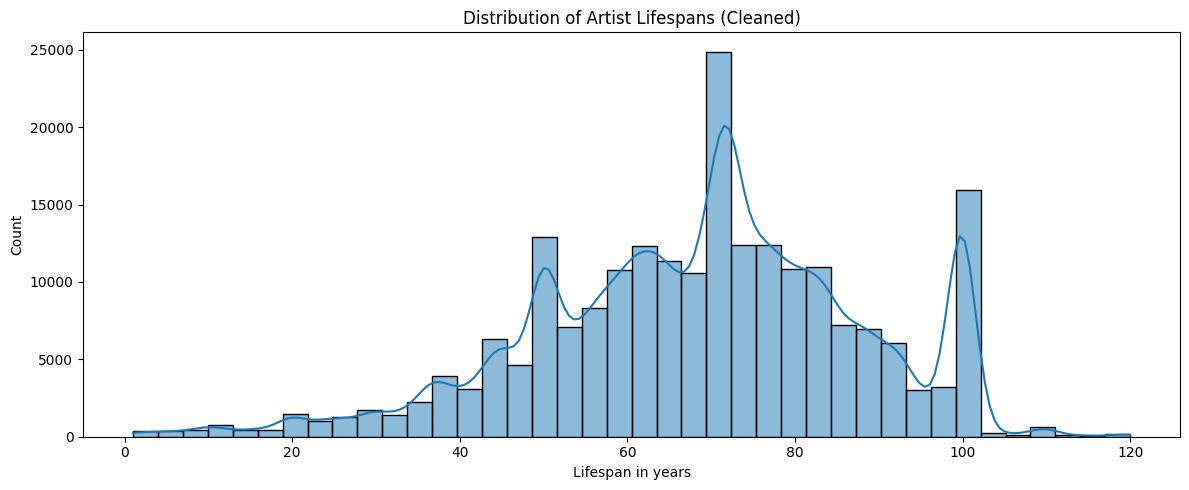

In [57]:
lifespan_valid = df["Artist_Lifespan"].dropna()
lifespan_valid = lifespan_valid[(lifespan_valid > 0) & (lifespan_valid <= 120)]

plt.figure(figsize=(12, 5))
sns.histplot(lifespan_valid, bins=40, kde=True)
plt.title("Distribution of Artist Lifespans (Cleaned)")
plt.xlabel("Lifespan in years")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

The distribution is *unimodal*, with the primary peak approximately between **60 and 80 years**, which aligns well with realistic human lifespans, especially for artists living in the 19th–20th centuries.

A smaller density exists between **40 and 60 years**, likely representing artists from earlier historical periods or incomplete biographical data.

A veryvisible number of entries reach **100–120 years**, which is biologically possible but uncommon. These values may correspond either to approximate/rounded historical records.

The same we can see on a Boxplot graph.

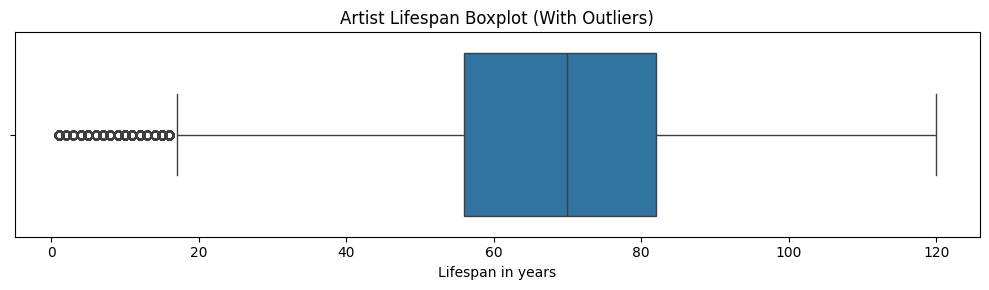

In [58]:
plt.figure(figsize=(10, 3))
sns.boxplot(x=lifespan_valid)
plt.title("Artist Lifespan Boxplot (With Outliers)")
plt.xlabel("Lifespan in years")
plt.tight_layout()
plt.show()

Now i want to try apply the IQR rule to remove outliers.

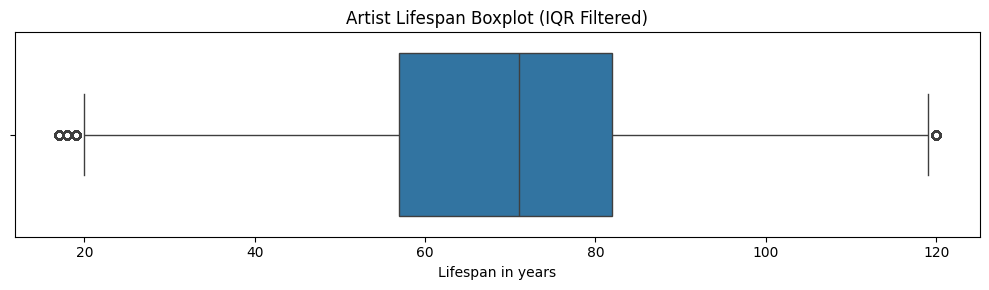

In [59]:
Q1 = lifespan_valid.quantile(0.25)
Q3 = lifespan_valid.quantile(0.75)
IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

lifespan_no_outliers = lifespan_valid[(lifespan_valid >= lower) & (lifespan_valid <= upper)]

plt.figure(figsize=(10, 3))
sns.boxplot(x=lifespan_no_outliers)
plt.title("Artist Lifespan Boxplot (IQR Filtered)")
plt.xlabel("Lifespan in years")
plt.tight_layout()
plt.show()

In [60]:
lifespan_valid.median()

70.0

The distribution becomes cleaner and compact, the median remains stable, indicating that outliers did not distort the central tendency. Very few outliers remain.

## Task 5.  Missing Data

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 484956 entries, 0 to 484955
Data columns (total 68 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   Object Number            484956 non-null  object        
 1   Is Highlight             484956 non-null  bool          
 2   Is Timeline Work         484956 non-null  bool          
 3   Is Public Domain         484956 non-null  bool          
 4   Object ID                484956 non-null  int64         
 5   Gallery Number           49541 non-null   object        
 6   Department               484956 non-null  category      
 7   AccessionYear            481094 non-null  object        
 8   Object Name              482690 non-null  object        
 9   Title                    456153 non-null  object        
 10  Culture                  208190 non-null  object        
 11  Period                   91143 non-null   object        
 12  Dynasty         

Dataset has nested location fields:

 * Country > Region > Subregion > City > Locale > Locus

We can use **Hierarchical Geographical Imputation** for Country, where use already cleaned field **Country_top30** (top 30 countries + "other")

In addition to geo data we can also consider **Culture** - often encodes geographic and historical identity directly:
- "Egyptian" → Egypt  
- "Persian" → Iran  
- "Japanese" → Japan  
- "Mayan" → Central America  

  
The logic is:

1. **Clean** City, Region, Culture.
2. Use geographic libraries to infer countries:
   - `geonamescache` for cities → country
   - `pycountry` + `rapidfuzz` for regions / cultures → country
3. Build a new field for Country without missing values:
   - If **Country_top30** is a known country (not missing and not "other") → keep it.
   - Else try to detect country from City, then Region, then Culture.
   - If detection finds a country that is *not* in the top 30, we keep this new country name.
   - If nothing can be detected, fall back to *"other"*.

This is a *library-based imputation* method that uses
geographic data, of course, libraries can't contain all the names of populated areas, but this method is still better than simply adding the mean/median.


In [62]:
display(df["City"].head(1000).unique())
display(df["City"].nunique())

array([nan, 'Philadelphia', 'Bristol', 'New York', 'Lebanon', 'Norwich',
       'East Cambridge', 'Somerville', 'Boston', 'Delft', 'Meriden',
       'Rye', 'Oyster Bay', 'New Lebanon', 'London', 'Portsmouth',
       'Boston|Philadelphia', 'Boston|Charlestown', 'Lititz', 'Chicago',
       'Wakefield', 'Portland', 'Salem', 'Newark', 'New York|Paris',
       'Bennington', 'Hartford', 'Paris', 'Petersburg', 'Alexandria',
       'Concord', 'Sandwich', 'Pittsburgh', 'Strasburg', 'Middletown',
       'Baltimore', 'Providence', 'Preston', 'Hartford|New York',
       'Charleston', 'Albany', 'Cincinnati', 'Worcester', 'Newburyport',
       'Barnstable|Bristol', 'Barnstable', 'Beverly', 'Hancock',
       'Brooklyn', 'Trenton', 'Troy', 'Cambridge', 'Dordrecht|Amsterdam',
       'Colchester', 'Enfield', 'Tarentum', 'Chelsea', 'Zanesville',
       'Mantua|New Geneva', 'Alloway', 'Wistarburg', 'Liverpool',
       'Canton', 'Mantua', 'Goshen', 'New Bedford',
       'East Cambridge|Sandwich', 'Findlay'

2622

In [63]:
display(df["Region"].head(100000).unique())
display(df["Region"].nunique())

array([nan, 'New England ', 'Midwest ', 'Bohemia', 'Southern',
       'New England |Midwest ', 'Flanders', 'Yorkshire and the Humber',
       'Worcestershire', 'Western', 'New England |Mid-Atlantic ',
       'Mid-Atlantic|New England', 'Mid-Atlantic ',
       'New England |Bohemia', 'Mid-Atlantic |New England ',
       'South United States', 'Alsace', 'Caucasus', 'Chiclayo', 'Berber',
       'Middle East', 'Ougadougou', 'Kafiristan', 'Yoruba',
       'South Sumatra', 'Sumatra', 'Kapuas Basin', 'Kupuas Basin',
       'Mindanao Island', 'Sulu Islands', 'Qalamoun', 'Northern Algeria',
       'Lamu', 'Yomut', 'Aceh, North Sumatra', 'Northern Africa',
       'Atlas region', 'Balkans', 'Bedouin', 'Caucasia'], dtype=object)

740

In [64]:
display(df["Culture"].head(2000).unique())
display(df["Culture"].nunique())

array([nan, 'Mexican', 'Guatemalan', 'American',
       'British (American market)', 'American or British', 'Dutch',
       'American, Shaker', 'British', 'French', 'Canadian',
       'American or French', 'Chinese', 'European', 'Spanish',
       'Dutch, probably', 'British, probably',
       'Chinese, for American market', 'British, possibly',
       'American or Irish', 'French, possibly', 'American, Japanese',
       'Venezuelan', 'British or Irish', 'British or Flemish',
       'American, probably', 'Bermudian, possibly', 'Irish', 'German',
       'Czech'], dtype=object)

7313

All three features contain:
- multiple locations combined with `|`
- uncertainty words ("possibly", "probably")
- parenthetical comments
- inconsistent capitalization

In [65]:
def clean_geo_field(text,
                    split_char="|",
                    remove_uncertainty=True,
                    remove_parentheses=True,
                    keep_first=True,
                    normalize_case=True):
    
    if pd.isna(text):
        return np.nan
    text = str(text)

    if keep_first and split_char in text:
        text = text.split(split_char)[0]

    if remove_uncertainty:
        text = re.sub(
            r"\b(possibly|probably|near|said to have been found in)\b",
            "",
            text,
            flags=re.IGNORECASE,
        )

    if remove_parentheses:
        text = re.sub(r"\(.*?\)", "", text)

    text = text.replace("?", "").replace('"', "").replace("'", "")

    text = text.strip()

    if normalize_case:
        text = text.title()

    return text if text else np.nan

Clean *City,region and Cultire* and display number of unique valus before and after cleaning:

In [66]:
df["City_clean"] = df["City"].apply(clean_geo_field)
print("City before: ", df["City"].nunique())
print("City after: ", df["City_clean"].nunique())

df["Region_clean"] = df["Region"].apply(clean_geo_field)
print("Region before: ", df["Region"].nunique())
print("Region after: ", df["Region_clean"].nunique())

def clean_culture(text):
    if pd.isna(text):
        return np.nan
    text = str(text).split(";")[0].split(",")[0]
    return clean_geo_field(text)

df["Culture_clean"] = df["Culture"].apply(clean_culture)
print("Culture before: ", df["Culture"].nunique())
print("Culture after: ", df["Culture_clean"].nunique())

City before:  2622
City after:  2064
Region before:  740
Region after:  658
Culture before:  7313
Culture after:  2822


In [67]:
gc = geonamescache.GeonamesCache()

cities_data = gc.get_cities()

city_to_country = {}

for cid, data in cities_data.items():
    name = data["name"].lower()
    code = data["countrycode"]
    country_obj = pycountry.countries.get(alpha_2=code)
    if country_obj:
        country_name = country_obj.name.lower()
        if name not in city_to_country:
            city_to_country[name] = country_name

known_city_names = list(city_to_country.keys())

print("Number of unique cities in geonamescache:", len(known_city_names))

Number of unique cities in geonamescache: 30678


In [68]:
country_name_list = set()

for c in pycountry.countries:
    country_name_list.add(c.name.lower())
    if hasattr(c, "official_name"):
        country_name_list.add(c.official_name.lower())
    if hasattr(c, "common_name"):
        country_name_list.add(c.common_name.lower())

country_name_list = list(country_name_list)
print("Unique country names:", len(country_name_list))

Unique country names: 425


Use geonamescache to map city -> country, try to match region\culture name directly to a country name

In [69]:
def infer_country_from_city(city):
    if pd.isna(city):
        return None
    txt = str(city).lower().strip()

    if txt in city_to_country:
        return city_to_country[txt]

    match = process.extractOne(txt, known_city_names, scorer=fuzz.WRatio)
    if match:
        best_name, score, _ = match
        if score >= 90:
            return city_to_country[best_name]

    return None


def infer_country_from_region(region):
    if pd.isna(region):
        return None
    txt = str(region).lower().strip()

    match = process.extractOne(txt, country_name_list, scorer=fuzz.partial_ratio)
    if match:
        best_name, score, _ = match
        if score >= 90:
            return best_name
    return None


def infer_country_from_culture(culture):
    if pd.isna(culture):
        return None
    txt = str(culture).lower().strip()

    match = process.extractOne(txt, country_name_list, scorer=fuzz.partial_ratio)
    if match:
        best_name, score, _ = match
        if score >= 90:
            return best_name
    return None

 Final decision for each row. Priority:
   * Country_top30 if known (not NaN and not 'other')
   * city -> country
   * region -> country
   * culture -> country
   * else 'other'

In [70]:
df["Country_top30"] = df["Country_top30"].replace("", np.nan)

def infer_country_row(row):

    base = row["Country_top30"]

    if pd.notna(base) and base != "other":
        return base

    c = infer_country_from_city(row["City_clean"])
    if c is not None:
        return c

    c = infer_country_from_region(row["Region_clean"])
    if c is not None:
        return c

    c = infer_country_from_culture(row["Culture_clean"])
    if c is not None:
        return c

    if base == "other":
        return "other"
    return "other"


df["Country_geo_full"] = df.apply(infer_country_row, axis=1)
df["Country_geo_full"] = df["Country_geo_full"].astype(str).str.lower()
print("Missing in Country_geo_full:", df["Country_geo_full"].isna().sum())

Missing in Country_geo_full: 0


In [85]:
sample = df[(df["Country_top30"].isna()) | (df["Country_top30"] == "other")][[
    "City_clean", "Region_clean", "Culture_clean",
    "Country", "Country_top30", "Country_geo_full"
]].sample(10)

display(sample)

,City_clean,Region_clean,Culture_clean,Country,Country_top30,Country_geo_full
165713,NaN,NaN,NaN,NaN,NaN,other
246022,NaN,NaN,NaN,NaN,NaN,other
143330,NaN,NaN,Cypriot,NaN,NaN,other
292581,NaN,NaN,NaN,NaN,NaN,other
201868,NaN,Southwestern Iran,NaN,NaN,NaN,iran
18130,NaN,NaN,Japanese,NaN,NaN,japan
463592,NaN,NaN,Acheulean,NaN,NaN,other
231525,NaN,NaN,NaN,NaN,NaN,other
225933,NaN,NaN,NaN,NaN,NaN,other
297008,NaN,NaN,NaN,NaN,NaN,other


We created a new field **Country_geo_full** that combines:

1. Existing cleaned information in **Country_top30**  
   (top 30 countries + "other").

2. Geographic inference using external libraries:
   - geonamescache: maps *City_clean* to a country using a global cities
     database (GeoNames).
   - pycountry + rapidfuzz: fuzzy match *Region_clean* and *Culture_clean*
     to real country names.

As a result, `Country_geo_full` has **no missing values** and represents a
imputation based on hierarchical geographic information and
external knowledge bases.

## Task 6. *Medium* Feature

In [118]:
display(df["Medium"].head(200).unique())
display(df["Medium"].nunique())

array(['Gold', 'Silver', 'Bronze or copper', 'Nickel', 'Pressed glass',
       'Mahogany, laminated',
       'Gold, amethysts, spessartites, tourmalines, fresh water pearls, quartzes, rock crystal, and enamel',
       'Oak, tulip poplar', 'Earthenware, basalt', 'Paper', 'Brass, iron',
       'Brass', 'Iron', 'Bell metal', 'Bell metal, possibly iron',
       'Iron, brass', 'Brass, steel', 'Wrought iron', 'Brass and iron',
       'Bronze, glass, iron', 'Earthenware', 'Earthenware, lusterware',
       'Bronze', 'Wood, gilt', 'Wood', 'Wood, marble',
       'Limestone, ceramic, and Fravrile glass',
       'Sheffield plate, earthenware, glass', 'Bronze, gilt brass',
       'Gilt bronze', 'Glass', 'Oak', 'Maple, ash', 'Maple',
       'Hard maple, soft maple, ash', 'Maple, oak',
       'Graphite on off-white wove paper', 'Poplar, ash',
       'Maple, cottonwood', 'Oak, spruce, maple', 'Pine, ash, maple',
       'Hickory, pine', 'Beech', 'Ash', 'Mahogany',
       'Walnut, white cedar, yellow pi

65907

**Medium** contains detailed descriptions of materials
used in objects:
- “Gold”
- “Wood; Walnut, leather, brass”
- “Mahogany, mahogany veneer, ash, tulip poplar”
- “Blown glass with applied decoration”
- “Oil on canvas”
- “Graphite and pen and ink on paper”
- … and over **65,000 unique strings**

This column is extremely messy:

- Mixed separators: commas, semicolons, “and”, slashes, etc.
- Contains **primary/secondary** comments
- Includes phrases like “probably”, “with applied decoration”
- Contains multiple materials per object
- Many synonyms (“mahogany veneer” = “mahogany”, “pressed glass” = “glass”)

For **KNN classification**, this high-cardinality text is unusable:
- KNN cannot work with 65,000 unique categories
- Distances become meaningless
- Most values occur *only once*



Firstly, to solve this i want to apply this transformations:

**Standardize text**
- Lowercase
- Remove punctuation
- Replace separators (, ; and / → comma)
- Remove descriptions ("applied decoration", "primary: …")


In [128]:
def clean_medium_text(text):
    if pd.isna(text):
        return ""

    text = text.lower()
    text = re.sub(r"\(.*?\)", "", text)

    text = re.sub(r"\b(primary|secondary|probably|possibly|with|and|applied|decoration)\b", "", text)

    text = re.sub(r"[;/\|]+", ",", text)

    text = re.sub(r"[^a-z,\s]", "", text)
    text = re.sub(r"\s+", " ", text).strip()

    return text

Break into individual material words:

In [101]:
def extract_raw_materials(text):
    if not text:
        return []
    tokens = [t.strip() for t in text.split(",")]
    tokens = [t for t in tokens if t]
    return tokens


I create a *synonym dictionary*:
 - “mahogany veneer” → “mahogany”
- “blown glass” → “glass”
- “earthenware / redware / stoneware / ceramic” → “ceramic”
- “graphite on paper”, “watercolor on paper” → “paper”
- “oil on canvas” → "canvas" + "oil"

In [99]:
CANONICAL_MATERIALS = {
    # metals
    "gold","silver","bronze","copper","brass","iron","steel","nickel","pewter",
    # woods
    "wood","oak","pine","walnut","maple","birch","mahogany","cedar","spruce","ash","beech","rosewood",
    # ceramics & stone
    "ceramic","porcelain","earthenware","stoneware","terracotta","stone","alabaster","plaster",
    # glass
    "glass",
    # textiles / organics
    "silk","wool","cotton","leather","paper","ivory",
    # mixed
    "enamel","marble"
}

SYNONYMS = {
    # glass
    "blown glass": "glass",
    "pressed glass": "glass",
    "flint glass": "glass",
    "lead glass": "glass",
    "favrile glass": "glass",
    "glass with applied decoration": "glass",
    # ceramics
    "tin-glazed earthenware": "ceramic",
    "earthenware": "ceramic",
    "stoneware": "ceramic",
    "porcelain": "ceramic",
    "terracotta": "ceramic",
    # wood veneers or combined forms
    "mahogany veneer": "mahogany",
    "ebonized walnut": "walnut",
}

 and then map synonyms and return canonical material if recognized:

In [135]:
def normalize_material(token):
    for syn, target in SYNONYMS.items():
        if syn in token:
            return target

    for mat in CANONICAL_MATERIALS:
        if mat in token:
            return mat

    return None

Prepare a list of **canonical materials** (20–30 categories):
- metals: gold, silver, bronze, copper, iron, steel, brass
- woods: oak, pine, walnut, maple, mahogany, cedar
- ceramics: ceramic, porcelain, earthenware, terracotta
- glass, stone, paper, textile, ivory, etc.

In [125]:
def clean_medium_list(text):
    cleaned = clean_medium_text(text)
    raw_list = extract_raw_materials(cleaned)

    materials = []
    for t in raw_list:
        mat = normalize_material(t)
        if mat:
            materials.append(mat)

    return list(sorted(set(materials)))

and create **final features**:
- **Medium_list_clean**: a list of normalized materials (multi-label) - most objects are made of *several* materials
- **Medium_primary**: first material (categorical)


Then for KNN we can convert cleaned *Medium_list_clean* into *multi-hot encoding* (one binary column per material), creating a simple *numerical feature matrix*  

In [127]:
df["Medium_list_clean"] = df["Medium"].apply(clean_medium_list)

In [132]:
df["Medium_primary"] = df["Medium_list_clean"].apply(lambda x: x[0] if x else "unknown")
df["Medium_primary"] = df["Medium_primary"].astype("category")

In [133]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 484956 entries, 0 to 484955
Data columns (total 74 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   Object Number            484956 non-null  object        
 1   Is Highlight             484956 non-null  bool          
 2   Is Timeline Work         484956 non-null  bool          
 3   Is Public Domain         484956 non-null  bool          
 4   Object ID                484956 non-null  int64         
 5   Gallery Number           49541 non-null   object        
 6   Department               484956 non-null  category      
 7   AccessionYear            481094 non-null  object        
 8   Object Name              482690 non-null  object        
 9   Title                    456153 non-null  object        
 10  Culture                  208190 non-null  object        
 11  Period                   91143 non-null   object        
 12  Dynasty         

In [131]:
unique_medium_lists = ( df["Medium_list_clean"]
    .apply(lambda x: tuple(x))
    .nunique()
)

display(unique_medium_lists)

unique_medium_lists = (df["Medium_list_clean"]
    .head(200)
    .apply(lambda x: tuple(x))
    .unique()
)
display(unique_medium_lists)

2108

array([('gold',), ('silver',), ('bronze',), ('nickel',), ('glass',),
       ('mahogany',), ('enamel', 'gold'), ('oak',), ('ceramic',),
       ('paper',), ('brass', 'iron'), ('brass',), ('iron',), (),
       ('brass', 'steel'), ('bronze', 'glass', 'iron'), ('wood',),
       ('marble', 'wood'), ('ceramic', 'glass', 'stone'),
       ('ceramic', 'glass'), ('brass', 'bronze'), ('ash', 'maple'),
       ('maple',), ('maple', 'oak'), ('ash',), ('cotton', 'maple'),
       ('maple', 'oak', 'spruce'), ('ash', 'maple', 'pine'), ('pine',),
       ('beech',), ('cedar', 'pine', 'walnut'), ('birch', 'maple'),
       ('mahogany', 'maple', 'pine'), ('pine', 'walnut'), ('walnut',),
       ('ash', 'mahogany'), ('beech', 'maple'),
       ('ash', 'mahogany', 'maple'), ('mahogany', 'pine'),
       ('mahogany', 'spruce'), ('ivory', 'pine'),
       ('ash', 'mahogany', 'oak'), ('leather', 'walnut'),
       ('mahogany', 'oak'), ('rosewood',), ('maple', 'steel'),
       ('leather', 'oak'), ('bronze', 'maple'),
  

As the result we have the large number of combinations - **2,108**, this reflects the fact that many objects
are made from multiple materials. The extracted **Medium_list_clean** captures
these multi-material compositions accurately.


In [124]:
display(df["Medium_primary"].unique())
df["Medium_primary"].nunique()

array(['gold', 'silver', 'bronze', 'nickel', 'glass', 'mahogany',
       'enamel', 'oak', 'ceramic', 'paper', 'brass', 'iron', 'unknown',
       'wood', 'marble', 'ash', 'maple', 'cotton', 'pine', 'beech',
       'cedar', 'birch', 'walnut', 'ivory', 'leather', 'rosewood',
       'steel', 'pewter', 'plaster', 'alabaster', 'stone', 'silk',
       'copper', 'wool', 'spruce'], dtype=object)

35

The **Medium_primary** feature reduces each object to only its
first-listed material, which greatly simplifies the data(now we have only **35** unique values) but loses
information.

 Which is better for KNN?

- **Medium_list_clean** more recommended:

  When converted into a multi-hot encoded vector, this feature provides multi-dimensional representation, allowing KNN to measure similarity
  between artworks based on shared materials.

- **Medium_primary:**  
  Can be used as a simple categorical variable (one-hot encoded).  
  Useful but less expressive than the full list of materials.

## Task 7. Extraction of the physical Dimensions

In [176]:
df["Dimensions"].value_counts().nlargest(20)

Dimensions
sheet: 2 11/16 x 1 3/8 in. (6.9 x 3.5 cm)    2297
Sheet: 2 3/4 x 1 1/2 in. (7 x 3.8 cm)        2278
Sheet: 2 1/2 × 1 7/16 in. (6.4 × 3.7 cm)     2141
Sheet: 2 3/4 × 1 1/2 in. (7 × 3.8 cm)        1966
35mm                                         1458
Sheet: 2 11/16 × 1 3/8 in. (6.8 × 3.5 cm)    1319
4 x 5 in.                                    1307
Sheet: 2 3/4 x 1 3/8 in. (7 x 3.5 cm)        1151
Approx. 3 1/2 × 7 in. (8.9 × 17.8 cm)         989
Sheet: 2 5/8 × 1 1/2 in. (6.7 × 3.8 cm)       921
Sheet: 3 1/2 × 2 1/2 in. (8.9 × 6.4 cm)       887
Sheet: 3 1/2 × 2 1/2 in. (8.9 × 6.3 cm)       873
Sheet: 5 3/8 × 3 3/8 in. (13.6 × 8.5 cm)      782
Approx. 10.2 x 6.3 cm (4 x 2 1/2 in.)         780
8 x 10 in.                                    767
7.9 x 7.9 cm (3 1/8 x 3 1/8 in.)              734
2 1/2 x 4 1/4 in.                             707
6 1/2 x 8 1/2 in.                             665
Sheet: 3 1/16 × 1 9/16 in. (7.7 × 4 cm)       645
Sheet: 2 5/8 × 1 7/16 in. (6.6 × 3.7 cm

In [141]:
df["Dimensions"].nunique()

264986

Feature **Dimensions** has 264986 unique values, which are unusable in raw form.

What we need to do:
1. Extract **height**, **width**, **depth**
2. Convert all units to **centimeters**
3. Handle multiple formats and irregularities
4. Produce numeric columns:
   - dim_height_cm
   - dim_width_cm
   - dim_depth_cm

we need a robust *regex-based parser* that:

- finds all cm values (`\d+(\.\d+)?`)
- converts in → cm using *(1 in = 2.54 cm)*
- gracefully handles missing values
- picks the first set of dimensions (standard)

In [175]:
INCH_TO_CM = 2.54

def inch_fraction_to_float(txt):
    txt = txt.strip()
    if " " in txt:
        whole, frac = txt.split()
        num, den = frac.split("/")
        return float(whole) + float(num) / float(den)
    if "/" in txt:
        num, den = txt.split("/")
        return float(num) / float(den)
    try:
        return float(txt)
    except:
        return None

In [174]:
def extract_parenthetical_dims(text):
    m = re.search(r"\((.*?)\)", text)
    if not m:
        return None, None
    inside = m.group(1)

    unit = None
    if "cm" in inside:
        unit = "cm"
    elif "in" in inside:
        unit = "in"

    raw_parts = re.split(r"[x×]", inside)
    dims = []

    for p in raw_parts:
        match = re.findall(r"(\d+\s\d+/\d+|\d+/\d+|\d+\.\d+|\d+)", p)
        if match:
            val = match[0]

            num = inch_fraction_to_float(val)
            if num is None:
                continue

            if unit == "in":
                dims.append(num * INCH_TO_CM)
            else:
                dims.append(num)

    return dims, unit

In [173]:
def extract_inline_dims(text):
    parts = re.split(r"[x×]", text)

    dims = []
    for p in parts:
        p = p.split("(")[0]
        match = re.findall(r"(\d+\s\d+/\d+|\d+/\d+|\d+\.\d+|\d+)", p)
        if match:
            val = match[0]
            dims.append(val)
    return dims

In [172]:
def parse_dimensions(text):
    if pd.isna(text):
        return np.nan, np.nan, np.nan

    text = str(text).lower().strip()

    dims_cm, unit = extract_parenthetical_dims(text)
    if dims_cm and unit == "cm":
        dims_cm = list(dims_cm) + [np.nan] * (3 - len(dims_cm))
        return dims_cm[0], dims_cm[1], dims_cm[2]

    inline_cm_parts = re.findall(
        r"(\d+\s\d+/\d+|\d+/\d+|\d+\.\d+|\d+)\s*cm(?!\))",
        text.split("(")[0]
    )

    if inline_cm_parts:
        vals = []
        for raw in inline_cm_parts:
            num = inch_fraction_to_float(raw)
            if num is not None:
                vals.append(num)
        vals = vals + [np.nan]*(3-len(vals))
        return vals[0], vals[1], vals[2]

    dims_in, unit = extract_parenthetical_dims(text)
    if dims_in and unit == "in":
        dims_in = list(dims_in) + [np.nan] * (3 - len(dims_in))
        return dims_in[0], dims_in[1], dims_in[2]

    inline_raw = extract_inline_dims(text.split("(")[0])
    if inline_raw:
        dims_float = []
        for raw in inline_raw:
            val = inch_fraction_to_float(raw)
            if val is not None:
                dims_float.append(val * INCH_TO_CM)
        dims_float = dims_float + [np.nan] * (3 - len(dims_float))
        return dims_float[0], dims_float[1], dims_float[2]

    return np.nan, np.nan, np.nan


In [169]:
parsed = df["Dimensions"].apply(parse_dimensions)

df["dim_height_cm"] = parsed.apply(lambda x: x[0])
df["dim_width_cm"]  = parsed.apply(lambda x: x[1])
df["dim_depth_cm"]  = parsed.apply(lambda x: x[2])


In [170]:
df[["Dimensions","dim_height_cm","dim_width_cm","dim_depth_cm"]].sample(20)

,Dimensions,dim_height_cm,dim_width_cm,dim_depth_cm
241070,block: 5 1/4 x 4 inches (13.3 x 10.4 cm) sheet...,13.3,10.4,NaN
324705,45 x 60 in. (114.3 x 152.4 cm),114.3,152.4,NaN
421753,NaN,NaN,NaN,NaN
297487,"Overall, with added strips, 8 1/2 x 7 1/4 in. ...",21.6,18.4,NaN
188929,H. 56 3/4 x W. 15 3/4 x D. 4 3/4 in. (144.1 x ...,144.1,40.0,12.1
22835,L. 72 3/4 in. (184.8 cm); L. of head 19 1/4 in...,184.8,NaN,NaN
474439,Sheet: 5 7/8 × 9 5/8 in. (15 × 24.5 cm),15.0,24.5,NaN
76920,NaN,NaN,NaN,NaN
372435,Sheet: 2 in. × 2 5/8 in. (5.1 × 6.7 cm),5.1,6.7,NaN
316284,Overall: 2 x 1 1/4 in. (5 x 3 cm),5.0,3.0,NaN


Looks fine.

#### The End.